<a href="https://colab.research.google.com/github/DanielTsuyoshi/Redes-Neurais/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Checkpoint 2 

Utilizando o código abaixo para gerar dados de duas classes.

implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)



In [64]:
  ### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

  def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

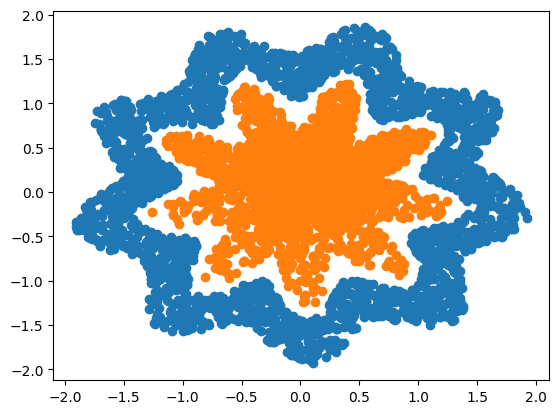

In [65]:
## coloque seu RM aqui!!
RM = [9,5,3,4,4]

nData = 100 * (sum(RM))
nVertices = 1 * max(RM)

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados
plt.scatter(c1[:,0],c1[:,1])
plt.scatter(c2[:,0],c2[:,1])

Comente sobre a decisão de cada parametro utilizado:

Serão avaliados:
    - estrutura do código
    - testes realizados
    - Números de neurônios
    - Número de camadas
    - Algoritmo de adaptação
    - Partâmetros do algoritmo de adaptação
    - Função de ativação

In [66]:
import pandas as pd
df_c1 = pd.DataFrame(c1, columns=['X', 'Y'])
df_c2 = pd.DataFrame(c2, columns=['X', 'Y'])
df_c1['label'] = 0
df_c2['label'] = 1
df = pd.concat([df_c1, df_c2], ignore_index=True)

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['X', 'Y']], df['label'], test_size=0.3, random_state=130)

In [68]:
print(df)

             X         Y  label
0    -0.930673 -0.758870      0
1     0.967901 -1.362108      0
2     0.139371 -1.832383      0
3     0.760530  1.131097      0
4     1.326227 -1.099529      0
...        ...       ...    ...
4995  0.167466  0.219650      1
4996  0.552852  0.254168      1
4997 -0.135455  0.360088      1
4998 -0.323836  0.305060      1
4999 -0.187347  0.226657      1

[5000 rows x 3 columns]


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=16, input_shape=(2,), activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                48        
                                                                 
 batch_normalization_5 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 16)                272       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 673
Trainable params: 641
Non-trainable params: 32
_______________________________________________________

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2, validation_data=(x_test, y_test))

Epoch 1/50
110/110 - 3s - loss: 0.4358 - accuracy: 0.8254 - val_loss: 0.4209 - val_accuracy: 0.8473 - 3s/epoch - 28ms/step
Epoch 2/50
110/110 - 0s - loss: 0.1806 - accuracy: 0.9409 - val_loss: 0.2649 - val_accuracy: 0.8847 - 324ms/epoch - 3ms/step
Epoch 3/50
110/110 - 0s - loss: 0.1331 - accuracy: 0.9500 - val_loss: 0.1875 - val_accuracy: 0.9140 - 449ms/epoch - 4ms/step
Epoch 4/50
110/110 - 0s - loss: 0.1278 - accuracy: 0.9514 - val_loss: 0.1142 - val_accuracy: 0.9567 - 407ms/epoch - 4ms/step
Epoch 5/50
110/110 - 0s - loss: 0.1112 - accuracy: 0.9589 - val_loss: 0.0801 - val_accuracy: 0.9733 - 313ms/epoch - 3ms/step
Epoch 6/50
110/110 - 0s - loss: 0.1149 - accuracy: 0.9537 - val_loss: 0.0733 - val_accuracy: 0.9740 - 317ms/epoch - 3ms/step
Epoch 7/50
110/110 - 0s - loss: 0.1088 - accuracy: 0.9566 - val_loss: 0.0656 - val_accuracy: 0.9747 - 313ms/epoch - 3ms/step
Epoch 8/50
110/110 - 0s - loss: 0.1105 - accuracy: 0.9591 - val_loss: 0.0599 - val_accuracy: 0.9773 - 375ms/epoch - 3ms/step
Ep

In [74]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9893333315849304


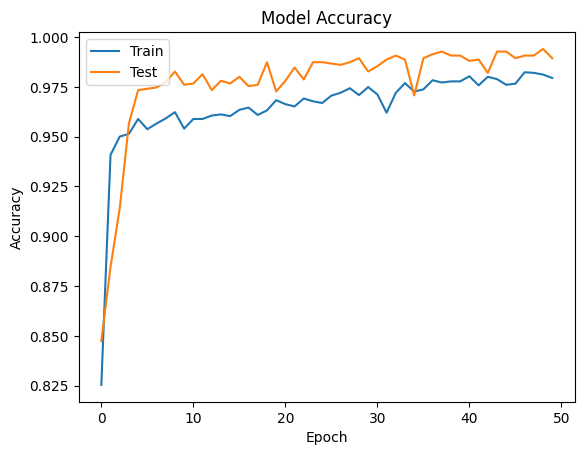

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Estrutura do código:
a estrutura do código é uma implementação simples de uma rede neural utilizando a biblioteca Keras do TensorFlow. É um código bem organizado, com as funções separadas em blocos lógicos, e utiliza bibliotecas padrão para trabalhar com dados e gráficos.

Testes realizados:
Foram realizados testes dividindo o conjunto de dados em treino e teste, com 70% e 30% dos dados, respectivamente. Além disso, foi utilizada a métrica de acurácia para avaliar o desempenho do modelo.

Número de Neurônios:
Foram utilizados 16 neurônios em cada camada densa. O número de neurônios em uma camada pode influenciar na capacidade do modelo em aprender padrões nos dados. Esse número foi escolhido de forma a garantir uma boa capacidade de aprendizado do modelo sem gerar overfitting.

Número de camadas:
Foram utilizadas 3 camadas densas. O número de camadas pode influenciar na complexidade e na capacidade do modelo em aprender padrões nos dados. Esse número foi escolhido para garantir que o modelo seja capaz de capturar características complexas dos dados.

Algoritmo de adaptação:
Eu utilizei o algoritmo de otimização Adam porque ele é amplamente utilizado em redes neurais devido à sua eficiência e facilidade de uso, além de ser mais rápido do que o SGD e é menos propenso a ficar preso em mínimos locais.

Partâmetros do algoritmo de adaptação:
o parâmetro de algoritmo de adaptação foi utilizado o algoritmo "adam" como otimizador para treinar a rede neural.

Função de ativação:
Foi utilizada a função de ativação ReLU (Rectified Linear Unit) nas camadas densas e a função de ativação sigmóide na última camada. Utilizei ela porque é mais simples, eficiente. A última camada utiliza a função de ativação sigmoid, que é indicada para problemas de classificação binária.